In [1]:
source("util.R")

In [2]:
densities_plot <- function(samples, 
                           distribution1, dfunc1, 
                           distribution2, dfunc2, 
                           color1, color2, title) {
  data <- data.frame(x = samples, 
                     density1 = dfunc1(samples), 
                     density2 = dfunc2(samples))
  gg <- ggplot(data) +
    geom_line(aes(x = samples, y = density1, color = "color1")) +
    geom_line(aes(x = samples, y = density2, color = "color2")) +
    xlab("x") + ylab("p") +
    ggtitle(title) +
    scale_color_manual(name = NULL, 
                       values = c("color1" = color1, "color2" = color2), 
                       labels = c(distribution1, distribution2) ) +
    theme(legend.background = element_rect(fill = "white", color = "black"))
}

In [3]:
illustrate_qqplot <- function(x_low, x_high,
                              ref_distribution, ref_dfunc, ref_pfunc, ref_qfunc,
                              test_distribution, test_dfunc, test_pfunc, test_qfunc,
                              theme) {
  
  samples <- seq(x_low, x_high, length.out = 100)
  ref_prob  <- ref_pfunc(q = samples)
  test_prob <- test_pfunc(q = samples)
  
  ref_data  <- data.frame(x = samples,   y = ref_prob)
  test_data <- data.frame(x = test_prob, y = samples)
  
  ref_quantiles <- ref_qfunc(ref_prob)
  test_quantiles <- test_qfunc(ref_prob)
  first_index <- which(test_quantiles > x_low)[1]
  below_x_high <- which(test_quantiles < x_high)
  last_index <- below_x_high[length(below_x_high)]
  qq_data <- data.frame(x = ref_quantiles[first_index:last_index], y = test_quantiles[first_index:last_index])

  ref_color = "green"
  test_color = "blue"
  densities <- densities_plot(samples, 
                              ref_distribution, ref_dfunc, 
                              test_distribution, test_dfunc, 
                              ref_color, test_color, "Dichtefunktionen") + theme
  test_cdf <- simple_ggplot(test_data, "p", "x", test_color, "Testverteilung") + theme
  ref_cdf <- simple_ggplot(ref_data, "x", "p", ref_color, "Referenzverteilung") + theme
  
  qq_plot <- simple_ggplot(qq_data, NULL, NULL, "black", "QQ-Plot")
  qq_plot <- qq_plot + geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed")
  qq_plot <- qq_plot + theme
  
  (test_cdf | qq_plot) / (densities | ref_cdf) +
    plot_layout(heights = c(1, 1), guides = 'collect') 
}

In [4]:
illustrate_qqnorm <- function(test_distribution, test_dfunc, test_pfunc, test_qfunc) {
  illustrate_qqplot(-3, 3,
                    "Standardnormalverteilung", dnorm, pnorm, qnorm, 
                    test_distribution, test_dfunc, test_pfunc, test_qfunc,
                    jupyter_theme())
}

In [5]:
qqnorm_t_distribution <- function(df) {
  illustrate_qqnorm(sprintf("t-Verteilung df=%d",df),
                    partial_func(dt, df=df),
                    partial_func(pt, df=df),
                    partial_func(qt, df=df))
}

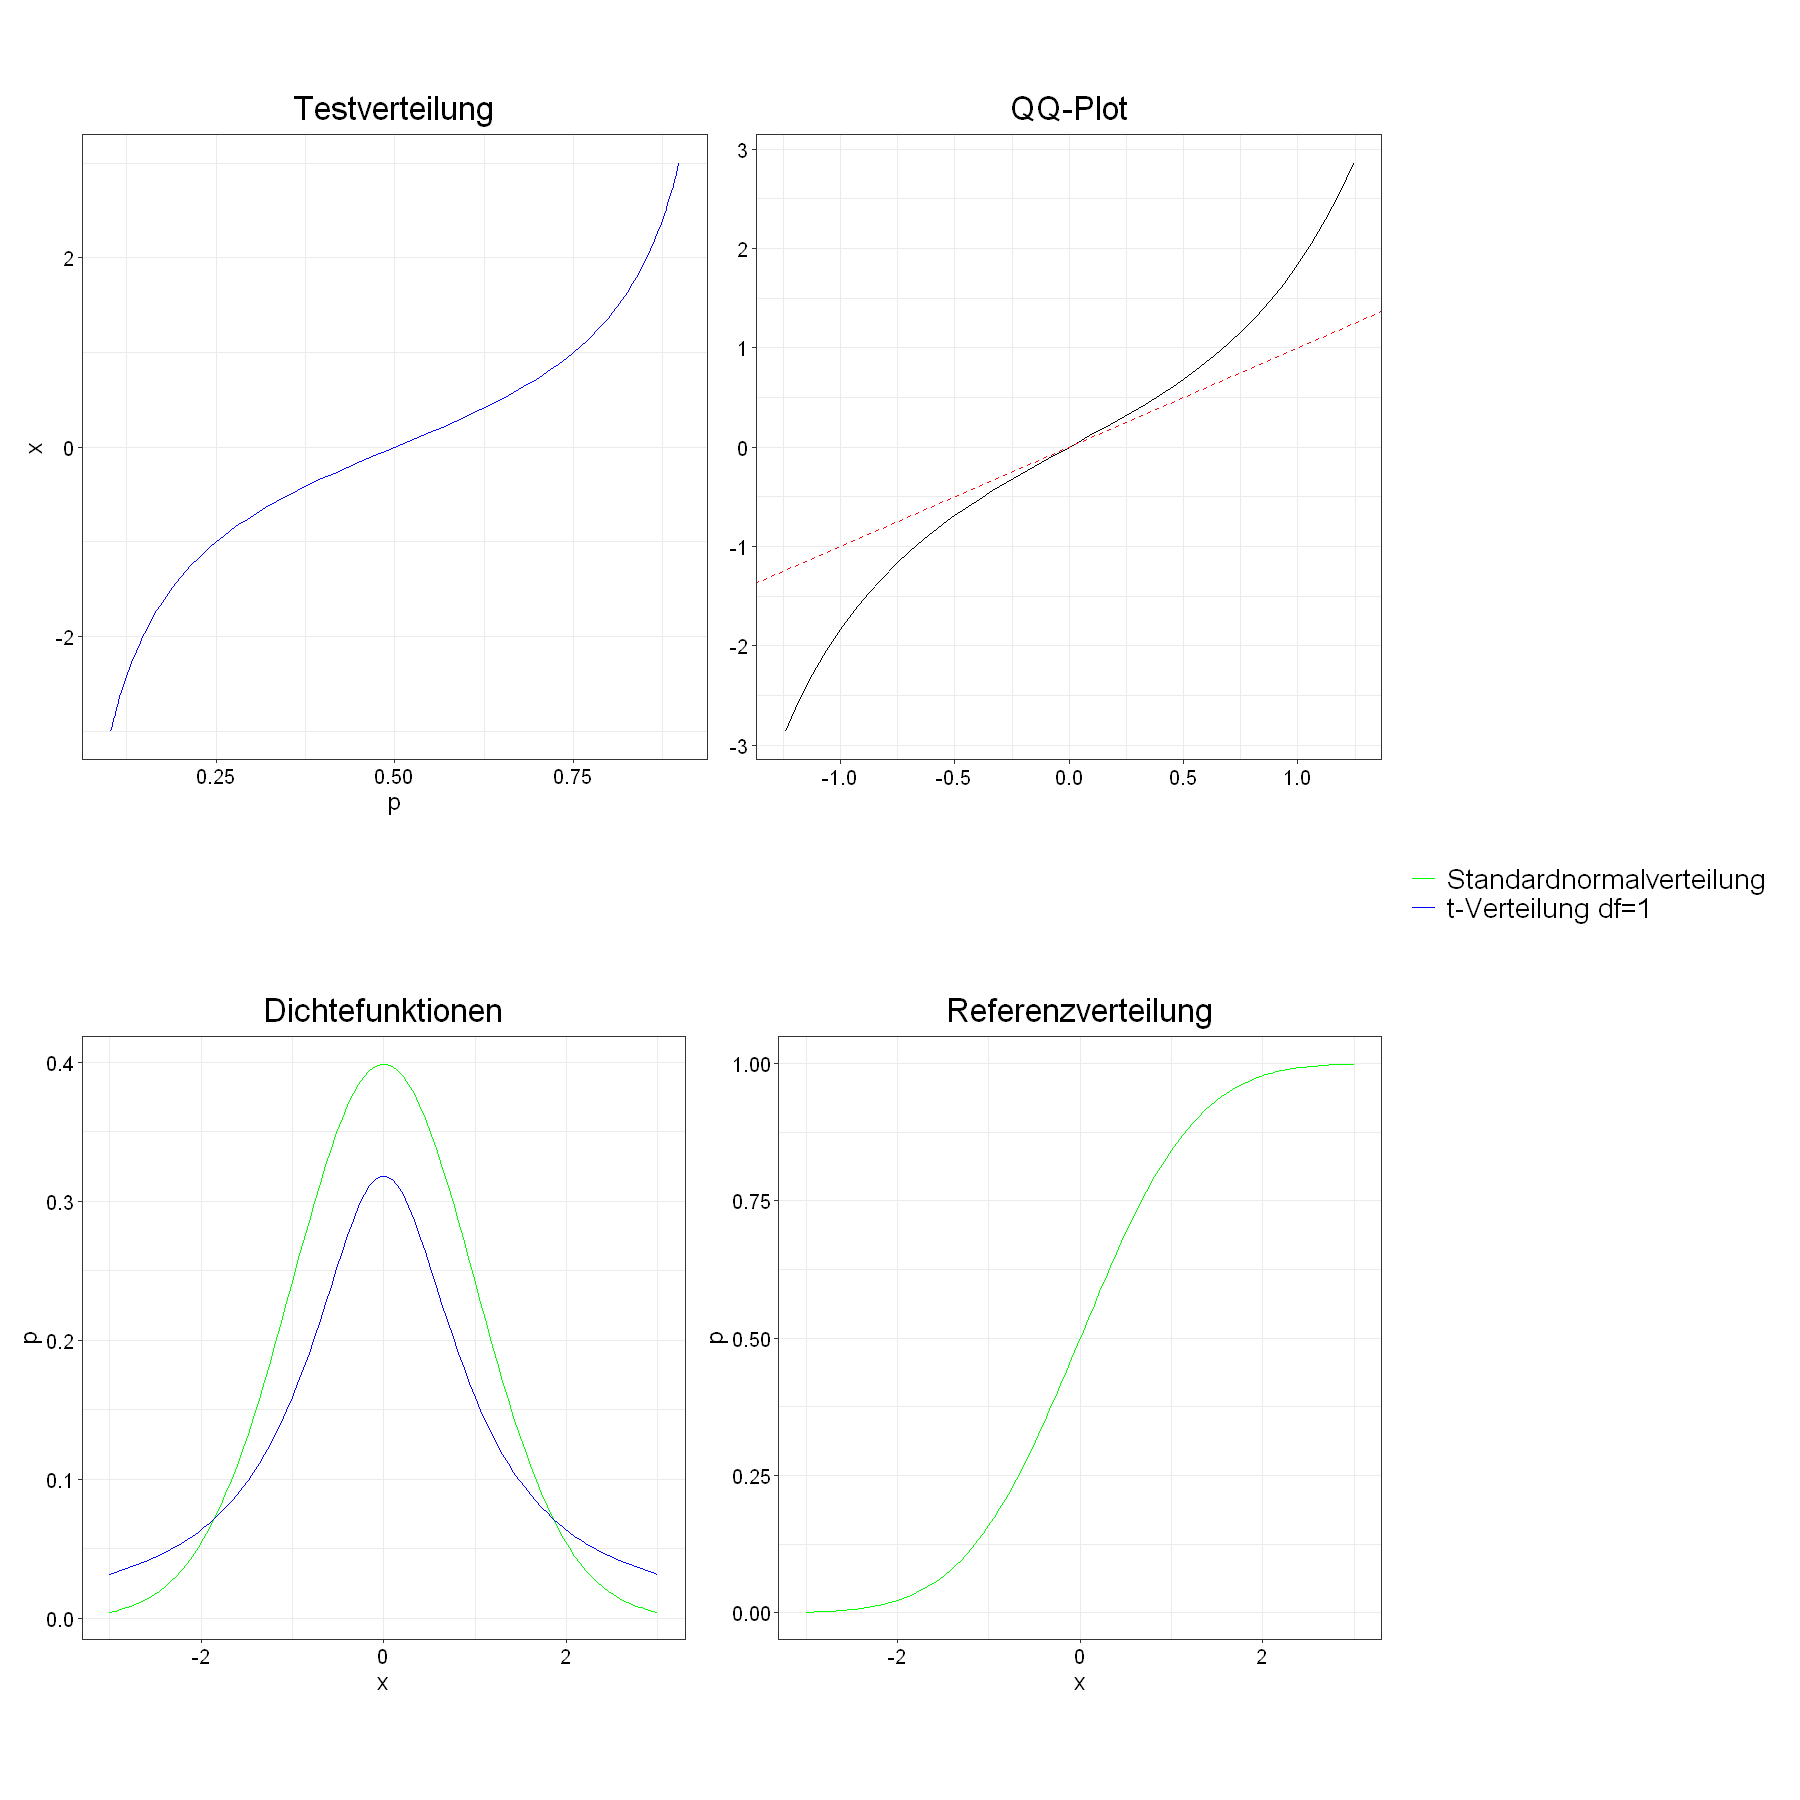

In [6]:
options(repr.plot.width=15, repr.plot.height=15)
gg <- qqnorm_t_distribution(1)
print(gg)

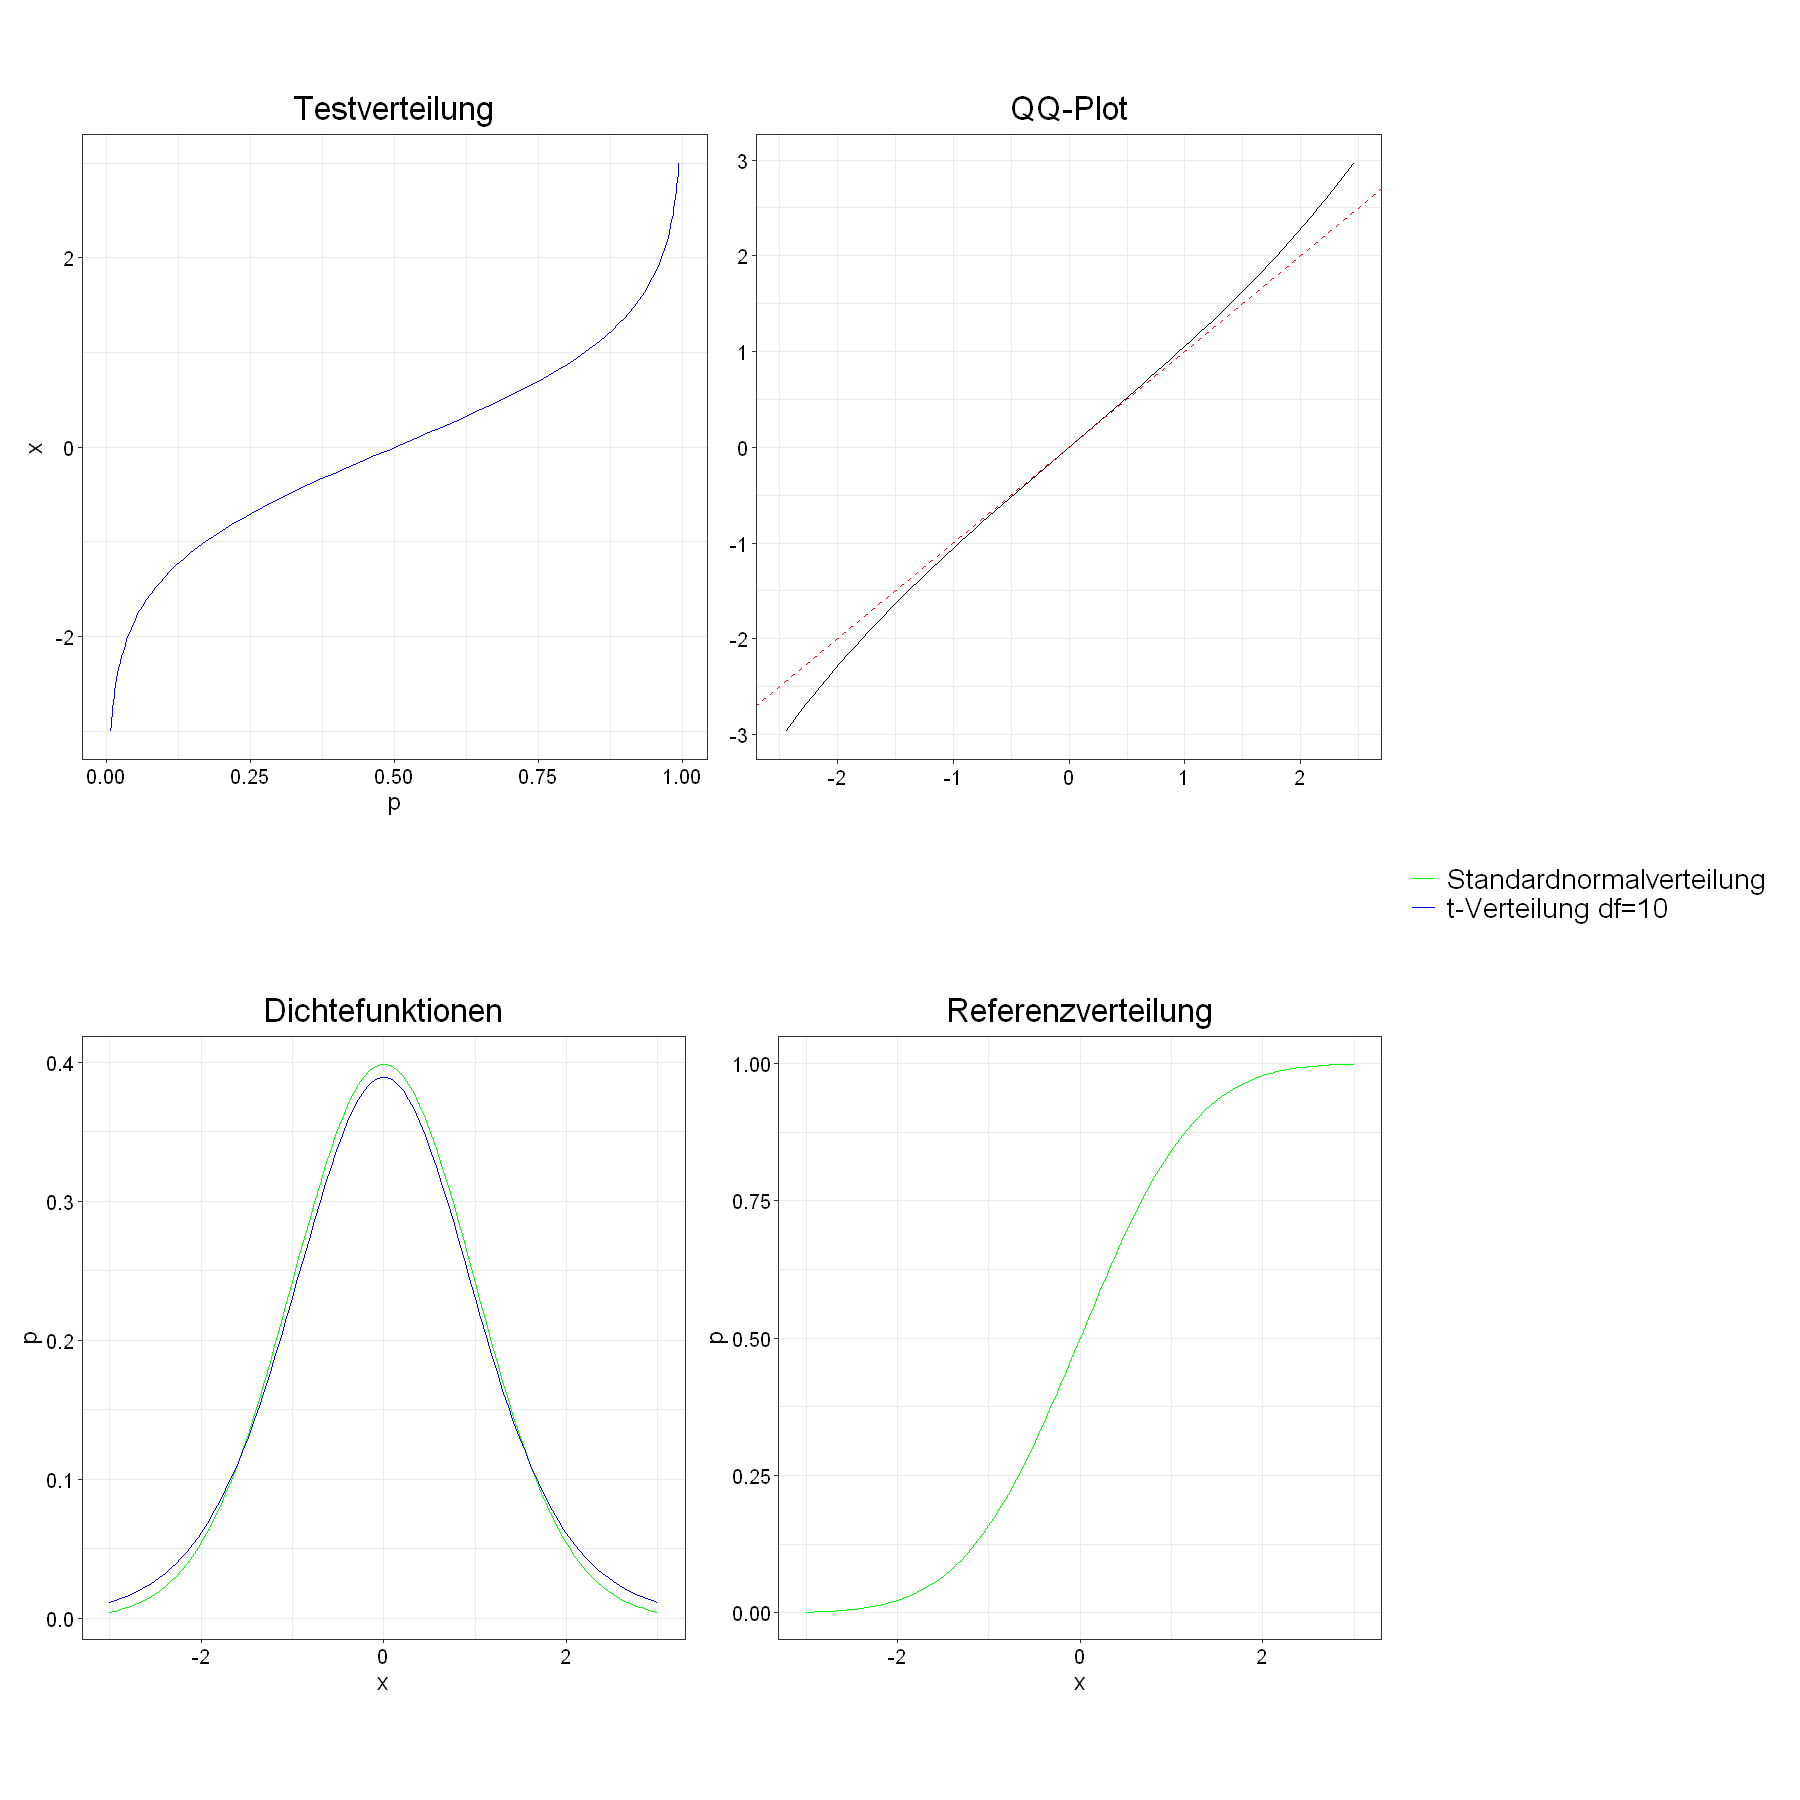

In [7]:
gg <- qqnorm_t_distribution(10)
print(gg)